In [1]:
# Read the packages
# Read the data
# Categorical and Numerical data

**Import the required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [3]:
path = r"C:\Users\madhu\OneDrive\Documents\Naresh IT\Data files\Visadataset.csv"

In [4]:
visa_df = pd.read_csv(path)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Divide into Categorical and Numerical columns**

In [5]:
types = dict(visa_df.dtypes)
cat_column = [key for key,value in types.items()  if value == 'object']
num_column = [key for key,value in types.items()  if value != 'object']
cat_column

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [6]:
cat_column = visa_df.select_dtypes(include = 'object').columns
num_column = visa_df.select_dtypes(exclude = 'object').columns
cat_column

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**How to selesct a specific columns**

In [106]:
visa_df['continent'] # series type

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [17]:
visa_df[['continent']] # dataframe type

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


In [9]:
visa_df.continent # series type

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [7]:
visa_df.loc[:,['continent']]

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


In [136]:
visa_df['continent'] # series type
visa_df[['continent']] # dataframe type
visa_df.continent # series type
visa_df.loc[:,['continent']]

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


**Read the multiple columns**

- Whenever we see multiple means recsall list

- keep the columns in list

- pass that list

In [137]:
visa_df.loc[:,['continent','case_status']]

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified


In [13]:
visa_df[['continent','case_status']] 

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified


$Task-1$

**We want to find the number of applicants continent wise**

- There is an Asia continent is there

- How many applicants are from Asia out of 25480

**Unique method**

- Unique will provide how many unique items are there in a particular column

In [14]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [15]:
len(visa_df['continent'].unique())

6

**nunique**

- gives count of unique items

In [16]:
visa_df['continent'].nunique()

6

In [17]:
# Step-1: Read the data with specific column
# Step-2: Apply the condition
#         When we apply the condition python will give True and False
# Step-3: In order o retrieve the True data'
#         dataframe_name[con]

In [18]:
visa_df['continent']
con = visa_df['continent'] == 'Asia'
len(visa_df[con])

16861

In [19]:
con = visa_df['continent'] == 'Asia'
len(visa_df[con])

len(visa_df[visa_df['continent'] == 'Asia'])

16861

In [107]:
for i in visa_df['continent'].unique():
    con = visa_df['continent'] == i
    count = (len(visa_df[con]))
    print(f"The number of applicants {i} is: {count}")

The number of applicants Asia is: 16861
The number of applicants Africa is: 551
The number of applicants North America is: 3292
The number of applicants Europe is: 3732
The number of applicants South America is: 852
The number of applicants Oceania is: 192


$Task-2$

- Now instead of printing count take empty list

- Save the values in empty list

- We already has unique continent list

- We also have count list

- Create a dataframe

In [8]:
continents= visa_df['continent'].unique()
count = []
for i in visa_df['continent'].unique():
    con = visa_df['continent'] == i
   
    count.append((len(visa_df[con])))
cols = ['Labels','Count']
continents_df = pd.DataFrame(zip(continents,count),columns = cols)
continents_df.to_csv('continents_df.csv',index = False)
continents_df

,Labels,Count
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


**value_counts**

In [10]:
cdf = visa_df['continent'].value_counts()
cdf

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [23]:
cat_column = visa_df.select_dtypes(include = 'object').columns
cat_column

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [24]:
visa_df['case_id'].unique()

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

In [25]:
visa_df['case_id'].nunique()

25480

In [26]:
visa_df['education_of_employee'].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [109]:
education_of_employees= visa_df['education_of_employee'].unique()
count = []
for i in visa_df['education_of_employee'].unique():
    con = visa_df['education_of_employee'] == i
   
    count.append((len(visa_df[con])))
cols = ['Labels','Count']
education_of_employee_df = pd.DataFrame(zip(education_of_employees,count),columns = cols)
education_of_employee_df.to_csv('education_of_employee.csv',index = False)
education_of_employee_df

,Labels,Count
0,High School,3420
1,Master's,9634
2,Bachelor's,10234
3,Doctorate,2192


In [28]:
visa_df['has_job_experience'].value_counts()


has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

In [29]:
visa_df['requires_job_training'].value_counts()

requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

In [30]:
visa_df['region_of_employment'].unique()


array(['West', 'Northeast', 'South', 'Midwest', 'Island'], dtype=object)

In [110]:
region_of_employment= visa_df['region_of_employment'].unique()
count = []
for i in visa_df['region_of_employment'].unique():
    con = visa_df['region_of_employment'] == i
   
    count.append((len(visa_df[con])))
cols = ['Labels','Count']
region_of_employment_df = pd.DataFrame(zip(region_of_employment,count),columns = cols)
region_of_employment_df.to_csv('region_of_employment.csv',index = False)
region_of_employment_df

,Labels,Count
0,West,6586
1,Northeast,7195
2,South,7017
3,Midwest,4307
4,Island,375


In [32]:

visa_df['unit_of_wage'].unique()

array(['Hour', 'Year', 'Week', 'Month'], dtype=object)

In [111]:
unit_of_wage = visa_df['unit_of_wage'].unique()
count = []
for i in visa_df['unit_of_wage'].unique():
    con = visa_df['unit_of_wage'] == i
   
    count.append((len(visa_df[con])))
cols = ['Labels','Count']
unit_of_wage_df = pd.DataFrame(zip(unit_of_wage,count),columns = cols)
unit_of_wage_df.to_csv('unit_of_wage.csv',index = False)
unit_of_wage_df

,Labels,Count
0,Hour,2157
1,Year,22962
2,Week,272
3,Month,89


In [34]:

visa_df['full_time_position'].value_counts()

full_time_position
Y    22773
N     2707
Name: count, dtype: int64

In [35]:

visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [112]:
unit_of_wage = visa_df['unit_of_wage'].unique()
count = []
for i in visa_df['unit_of_wage'].unique():
    con = visa_df['unit_of_wage'] == i
   
    count.append((len(visa_df[con])))
cols = ['Labels','Count']
unit_of_wage_df = pd.DataFrame(zip(unit_of_wage,count),columns = cols)
unit_of_wage_df.to_csv('unit_of_wage.csv',index = False)
unit_of_wage_df

,Labels,Count
0,Hour,2157
1,Year,22962
2,Week,272
3,Month,89


In [113]:
case_status = visa_df['case_status'].unique()
count = []
for i in visa_df['case_status'].unique():
    con = visa_df['case_status'] == i
   
    count.append((len(visa_df[con])))
cols = ['Labels','Count']
case_status_df = pd.DataFrame(zip(case_status,count),columns = cols)
case_status_df.to_csv('case_status.csv',index = False)
case_status_df

,Labels,Count
0,Denied,8462
1,Certified,17018


**Bank Dataset**

In [114]:
path = r"C:\Users\madhu\OneDrive\Documents\Naresh IT\Data files\bank.csv"

In [115]:
bank_df = pd.read_csv(path,sep=';') 
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [34]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [116]:
types = dict(bank_df.dtypes)
cat_columns = [key for key,values in types.items() if values == 'object' ]
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [148]:
bank_df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [117]:
job = bank_df['job'].unique()
count = []
for i in job:
    con = bank_df['job'] == i
    count.append(len(bank_df[con]))

cols = ['Job Type', 'Number of employee']
job_df = pd.DataFrame(zip(job,count),columns =cols)
job_df

,Job Type,Number of employee
0,unemployed,128
1,services,417
2,management,969
3,blue-collar,946
4,self-employed,183
5,technician,768
6,entrepreneur,168
7,admin.,478
8,student,84
9,housemaid,112


In [118]:
marital_status = bank_df['marital'].unique()
count = []
for i in marital_status:
    con = bank_df['marital'] == i
    count.append(len(bank_df[con]))

cols = ['marital status', 'Number of employee']
marital_df = pd.DataFrame(zip(marital_status,count),columns =cols)
marital_df

,marital status,Number of employee
0,married,2797
1,single,1196
2,divorced,528


- We created a dataframe of unique values of a column and its count

- We created by our own way, by using for loop

- The same operation we can get by using **value_counts**

In [33]:
dir(cdf)

NameError: name 'cdf' is not defined

In [45]:
cdf.items()

In [121]:
keys = cdf.keys()
keys

Index(['Certified', 'Denied'], dtype='object', name='case_status')

In [120]:
values = cdf.values
values

array([17018,  8462], dtype=int64)

In [119]:
pd.DataFrame(zip(keys,values))

,0,1
0,Certified,17018
1,Denied,8462


In [35]:
cdf = visa_df['continent'].value_counts()

keys = cdf.keys()
values = cdf.values
cols = ['Labels','Count']
df = pd.DataFrame(zip(keys,values),columns = cols)
df.to_csv('Continent.csv',index = False)
df

,Labels,Count
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


In [122]:
cat_column

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [123]:
cdf = visa_df['education_of_employee'].value_counts()

keys = cdf.keys()
values = cdf.values
cols = ['Labels','Count']
df = pd.DataFrame(zip(keys,values),columns = cols)
df.to_csv('Continent.csv',index = False)
df

,Labels,Count
0,Bachelor's,10234
1,Master's,9634
2,High School,3420
3,Doctorate,2192


- We need to change column name

- We need to change save the file name as column name

In [3]:
for i in cat_column[1:]:
    cdf = visa_df[i].value_counts()
    keys = cdf.keys()
    values = cdf.values
    cols = ['Labels','Count']
    df = pd.DataFrame(zip(keys,values),columns = cols)
    path = r"C:\Users\madhu\OneDrive\Documents\Naresh IT\EDA"
    df.to_csv(f'{path}\\{i}.csv',index = False)
    df

NameError: name 'cat_column' is not defined

**Normalize**

- Relatove Frequency Table

- Will give percentage of labels in the column


In [125]:
cdf = visa_df['continent'].value_counts(normalize=True)
round(cdf*100,2)

continent
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: proportion, dtype: float64

**Bar Chart**

- Bar chart is the grapkical representation of frequency table

- Bar graph is a plot between count and class

- In order to plot a bar chart we require two columns

    - Categorical column
 
    - Numerical column
 
- We already created a Frequency Table for **continents_df**

    - Here we have cols =  ['Continent','Number of Applicants']

    - Categorical column is **Continents**
 
    - Numerical column is **Number of Applicants**
 
- Package **matplotlib**
  

In [126]:
continents= visa_df['continent'].unique()
count = []
for i in visa_df['continent'].unique():
    con = visa_df['continent'] == i
   
    count.append((len(visa_df[con])))
cols = ['Continent','Number of Applicants']
continents_df = pd.DataFrame(zip(continents,count),columns = cols)
continents_df.to_csv('continents_df.csv',index = False)
continents_df

,Continent,Number of Applicants
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


In [127]:
education_of_employees = visa_df['education_of_employee'].unique()
count = []
for i in visa_df['education_of_employee'].unique():
    con = visa_df['education_of_employee'] == i
   
    count.append((len(visa_df[con])))
cols = ['education_of_employee','Number of Applicants']
education_of_employee_df = pd.DataFrame(zip(education_of_employees,count),columns = cols)
education_of_employee_df.to_csv('education_of_employee.csv',index = False)
education_of_employee_df

,education_of_employee,Number of Applicants
0,High School,3420
1,Master's,9634
2,Bachelor's,10234
3,Doctorate,2192


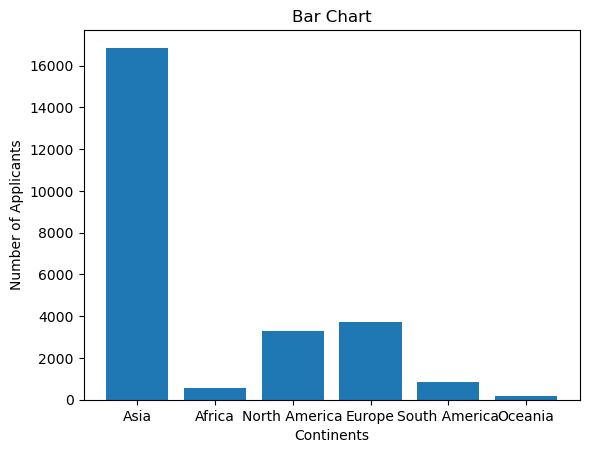

In [96]:
import matplotlib.pyplot as plt
plt.bar('Continent', # cat cloumn :X-axis
        'Number of Applicants',# num column : Y-axis
        data = continents_df)

plt.title("Bar Chart") # Title of the graph
plt.xlabel("Continents") # X-axis name
plt.ylabel("Number of Applicants") #Y-axis name
plt.savefig("Continents_bar_chart.jpg")
plt.show() # Show will avoid the graph and it will always come in last

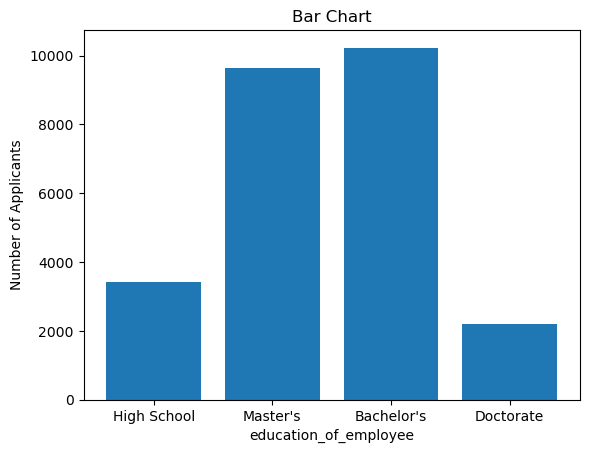

In [128]:
import matplotlib.pyplot as plt
plt.bar('education_of_employee', # cat cloumn :X-axis
        'Number of Applicants',# num column : Y-axis
        data = education_of_employee_df)

plt.title("Bar Chart") # Title of the graph
plt.xlabel("education_of_employee") # X-axis name
plt.ylabel("Number of Applicants") #Y-axis name
plt.savefig("education_of_employee_bar_chart.jpg")
plt.show()

**Bar Chart using Seaborn**

- We can plot bar charts using with many packages

- One package is matplotlib

- Another package is seaborn

- In matplotlib the method is **plt.bar**

- In matplotlib the method is **countplot**

- In matplotlib

    - We will take raw data
 
    - We will create our frequency table
 
    - We will pass the Column 1, Column 2, and dataframe name
 
- In Seaborn

    - It takes direct raw data
 
    - We will provide direct column name
 
    - we will provide main dataframe name



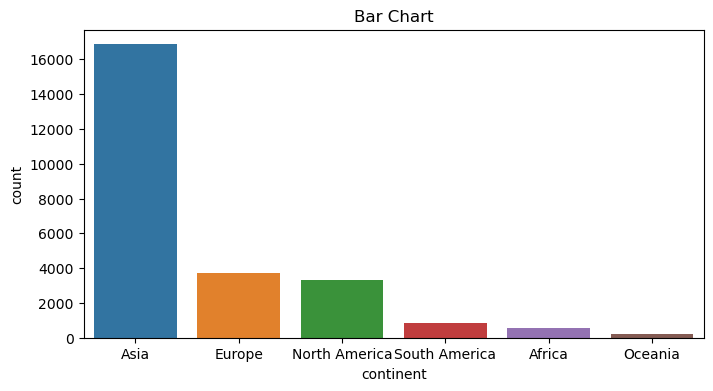

In [129]:
# Continent Column === continents_df =====plt.bar
# Continent column directly === visa_df

import seaborn as sns
plt.figure(figsize = (8,4))
order_continent= ['Asia','Europe','North America','South America','Africa','Oceania'] 
sns.countplot(data = visa_df,
             x = 'continent',
             order = order_continent )
plt.title("Bar Chart")
plt.savefig("Continents_bar_chart_using_seaborn.jpg")
plt.show()

In [124]:
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

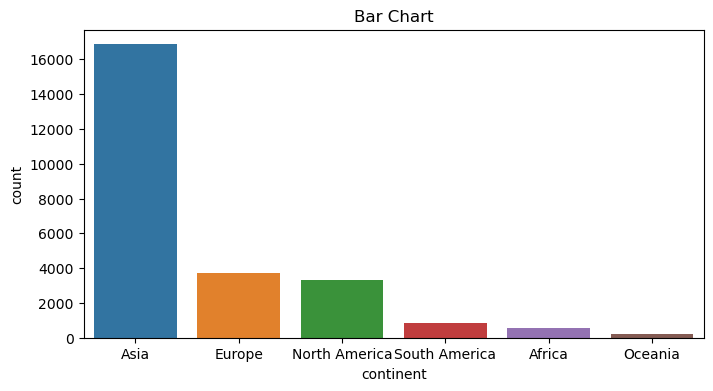

In [130]:

import seaborn as sns
plt.figure(figsize = (8,4))
order_continents = visa_df['continent'].value_counts().keys()
sns.countplot(data = visa_df,
             x = 'continent',
             order = order_continents )
plt.title("Bar Chart")
plt.savefig("Continents_bar_chart_using_seaborn.jpg")
plt.show()

$Task-3$

**Using For Loop Plot the bar chart of all the categorical column**

- We can use Seaborn and matplotlib

- Seaborn : countplot requires only raw data, direct column name and main data

- Maplotlib : Requires frequency table

    - From raw data, will make value counts
 
    - From value counts we are making keys and values seperately
 
    - Then we are creating a dataframe
 
- Start with Seaborn

    - then we require cat column names

    - and main dataframe
 
- Start with matplotlib

    - We already created a folder in pour laptop: Value_counts_df

In [163]:
# where you want to save
# graphs_seaborn folder

**How to create a folder**

In [167]:
import os
os.getcwd()

'C:\\Users\\madhu\\Documents\\Naresh IT\\EDA'

**os.makedirs()**

- makedirs craete a leaf directory

- means it will take the current working directory and creates one extra folder

- Here my python file is on **EDA** folder

- Now I want to cfraete a new folder **graphs_seaborn**

- Whuch is one step ahead of EDA folder : EDA\graphs_seaborn

- Pass the full path inside the mkdirs

- path : 'C:\\Users\\madhu\\Documents\\Naresh IT\\EDA'


In [3]:
import os
os.makedirs('C:\\Users\\madhu\\Documents\\Naresh IT\\EDA\graphs_seaborn')


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\madhu\\Documents\\Naresh IT\\EDA\\graphs_seaborn'

In [9]:
# Step-1:

root_directory = os.getcwd()
root_directory

# Step-2:
new_folder = 'graphs_seaborn'

# Step-3:
new_dir = os.path.join(root_directory,new_folder)
new_dir

# Step-4:
os.makedirs(new_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\madhu\\Documents\\Naresh IT\\EDA\\graphs_seaborn'

In [44]:
try:
    root_directory = os.getcwd()
    new_folder = 'graphs_seaborn'
    new_dir = os.path.join(root_directory,new_folder)
    os.makedirs(new_dir)

except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\madhu\\Documents\\Naresh IT\\EDA\\graphs_seaborn'


In [177]:
f'{new_dir}\\{i}.jpg'

'C:\\Users\\madhu\\Documents\\Naresh IT\\EDA\\graphs_seaborn\\case_status.jpg'

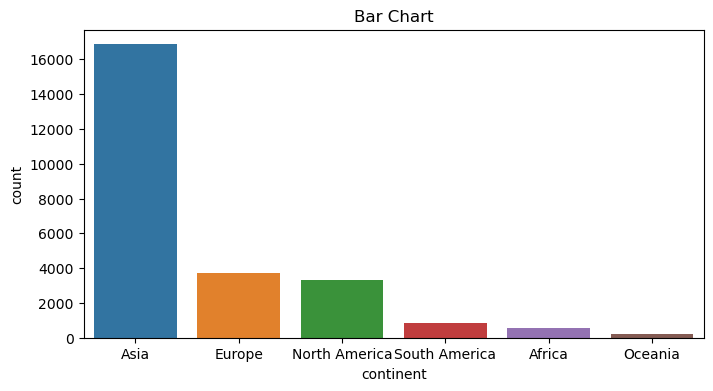

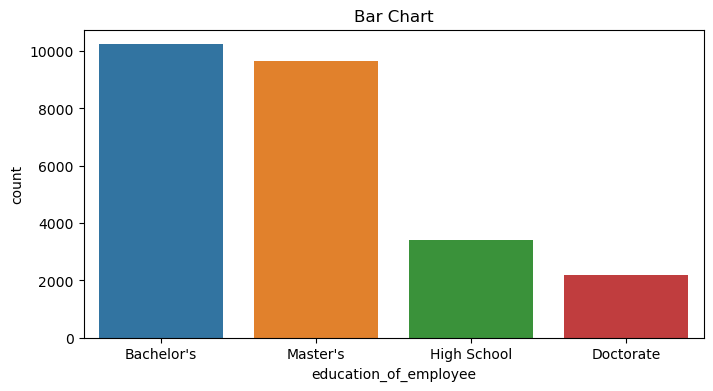

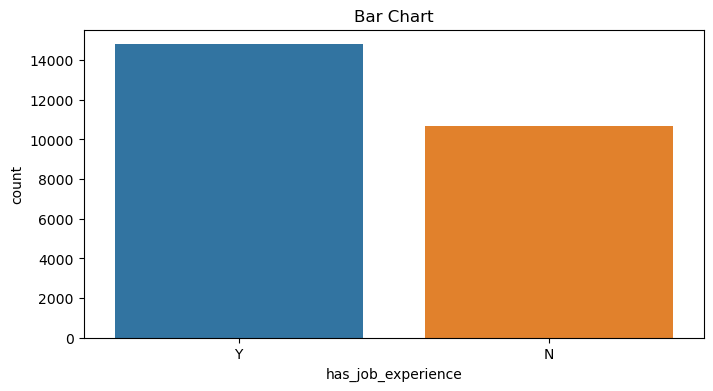

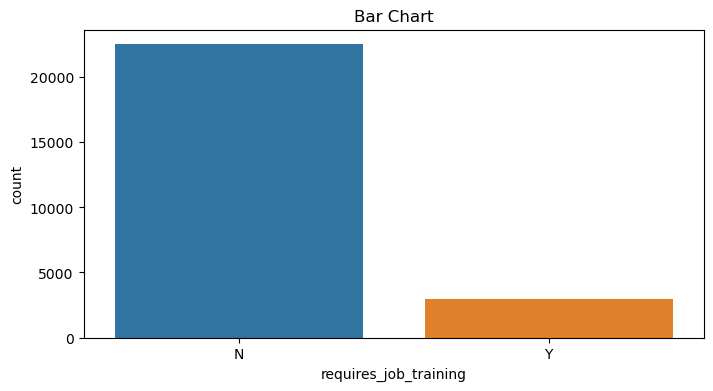

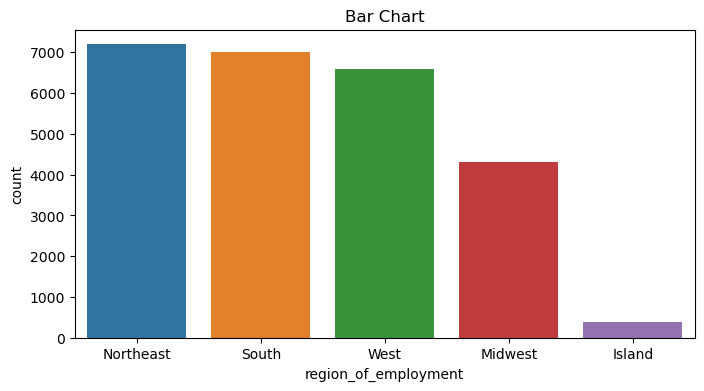

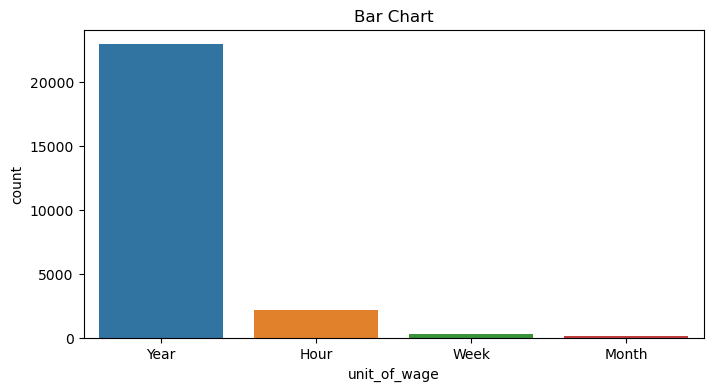

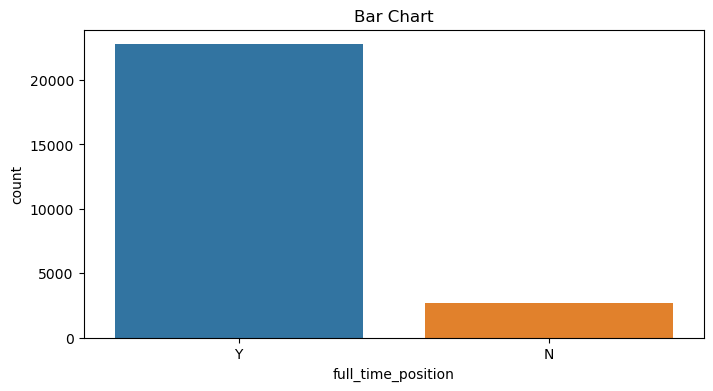

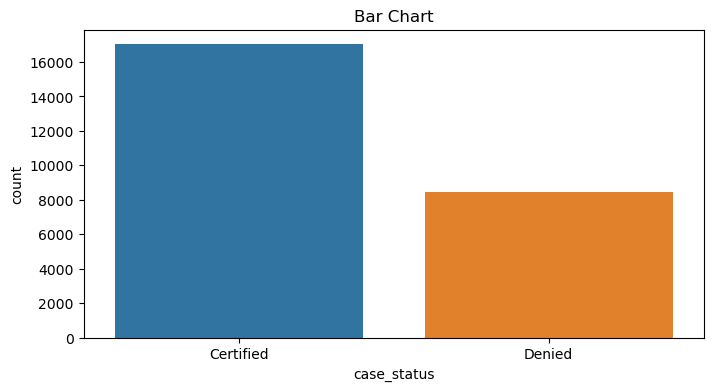

In [131]:
import seaborn as sns
for i in cat_column[1:]:
    plt.figure(figsize = (8,4))
    order_continents = visa_df[i].value_counts().keys()
    sns.countplot(data = visa_df,
                 x = i,
                 order = order_continents )
    plt.title("Bar Chart")
    plt.savefig(f"{new_dir}\{i}_seaborn.jpg")
    plt.show()

$Task-4$

**Using Matplotlib**

In [194]:
try:
    root_directory = os.getcwd()
    new_folder = 'graphs_matplotlib'
    new_dir = os.path.join(root_directory,new_folder)
    os.makedirs(new_dir)

except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\madhu\\Documents\\Naresh IT\\EDA\\graphs_matplotlib'


In [8]:
root_directory = os.getcwd()
new_folder = 'Value_counts_df'
dir = os.path.join(root_directory,new_folder)
os.makedirs(dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\madhu\\Documents\\Naresh IT\\EDA\\Value_counts_df'

In [160]:
dfs = os.listdir(r'C:\Users\madhu\OneDrive\Documents\Naresh IT\EDA')
dfs

['case_status.csv',
 'continent.csv',
 'education_of_employee.csv',
 'full_time_position.csv',
 'has_job_experience.csv',
 'region_of_employment.csv',
 'requires_job_training.csv',
 'unit_of_wage.csv']

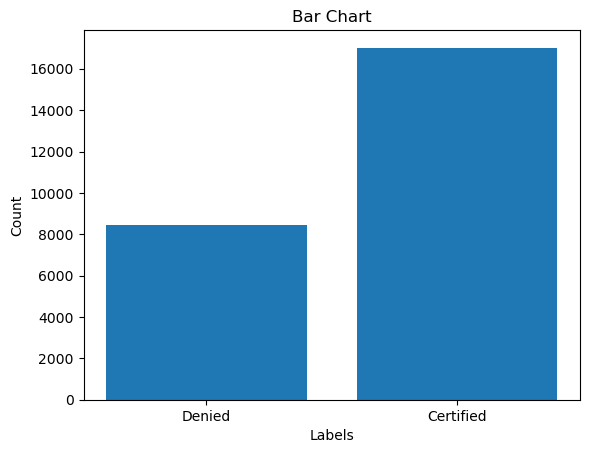

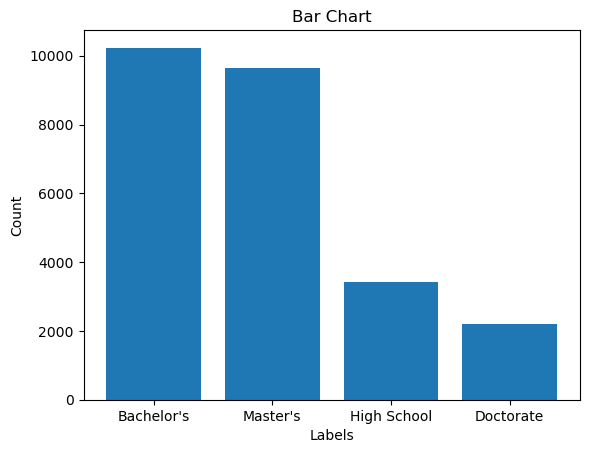

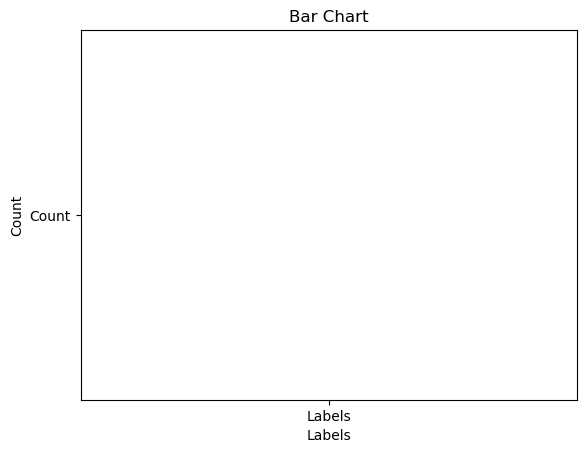

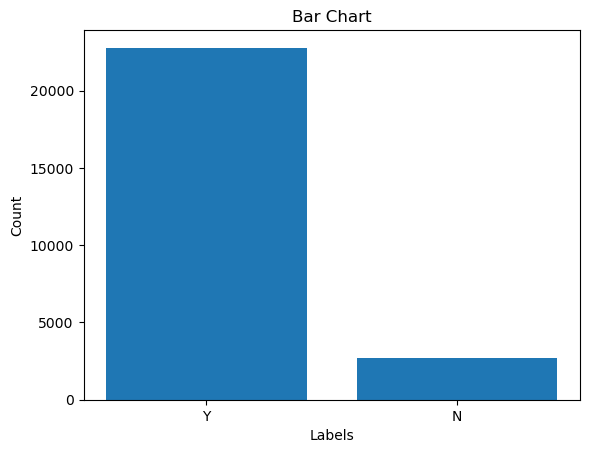

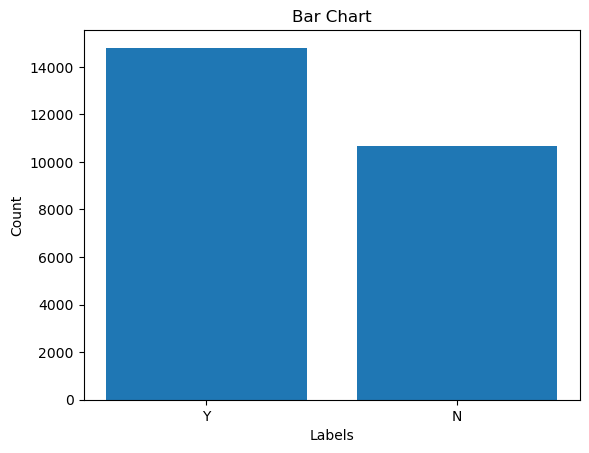

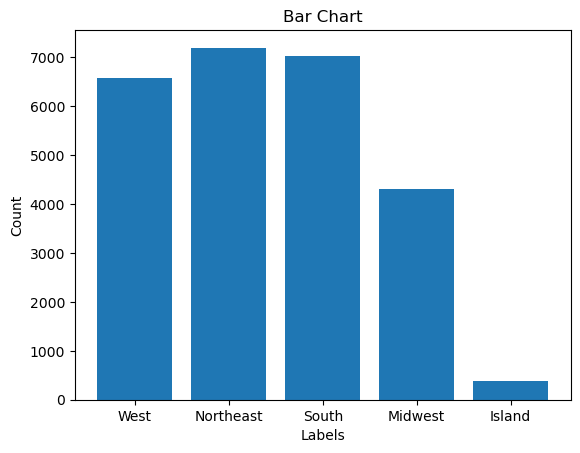

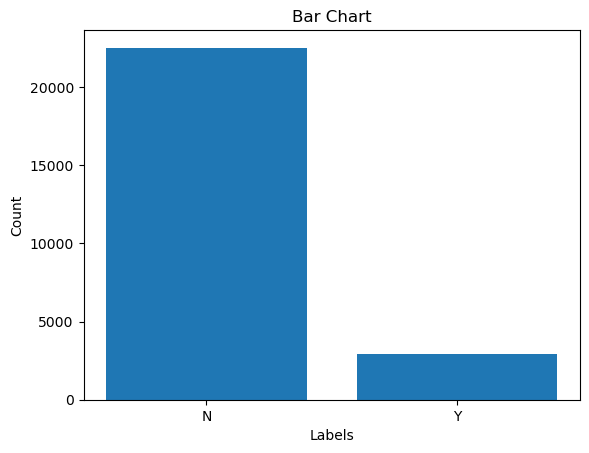

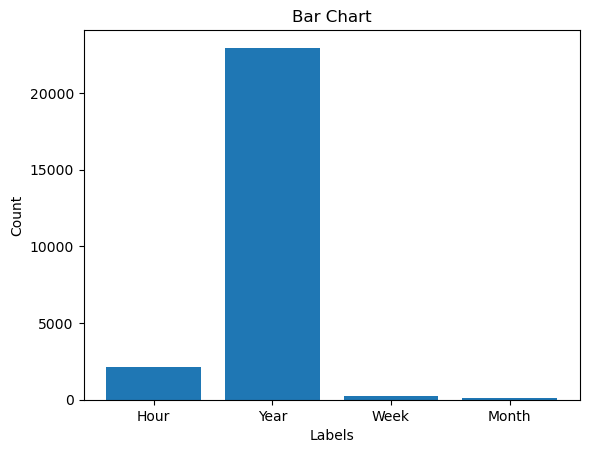

In [132]:
import matplotlib.pyplot as plt
for i in dfs:
    df = pd.read_csv(i)
    plt.bar('Labels', 
            'Count',
            data = df)
    
    plt.title("Bar Chart") 
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.savefig(f"{new_dir}\\{i}_matplotlib.jpg")
    plt.show() 

**Subplots**

- If we have multiple plots when we apply for loop it is giving one by one

- It is hard to see all the graphs

- Subplots is a kind of a matrix representation

- Suppose we have 2x2 matrix means 4 values, means 4 plots we can plot

- First plot position represents with (2,2,1)

- Second plot position represents with (2,2,2)

- Third plot position represents with (2,2,3)

- Fourth plot position represents with (2,2,4)


<Axes: >

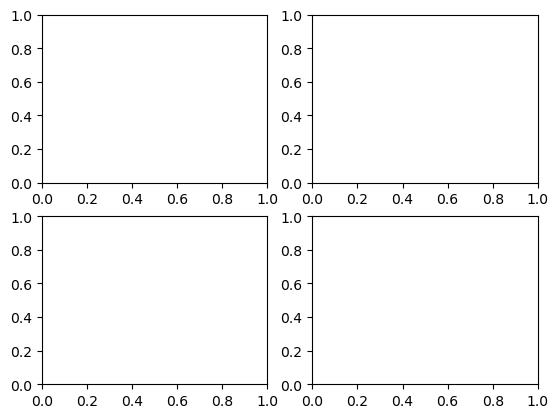

In [133]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)


# plt.subplot(2,2,i)

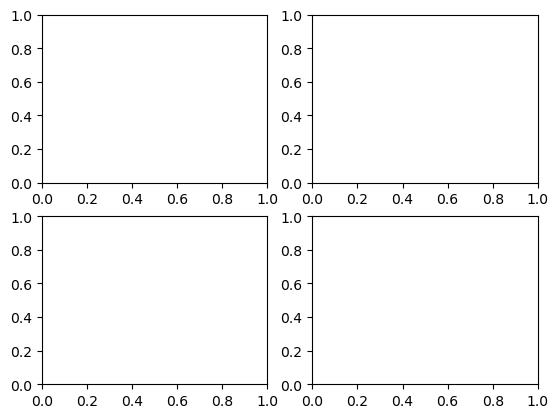

In [134]:
for i in range(1,5):
    plt.subplot(2,2,i)


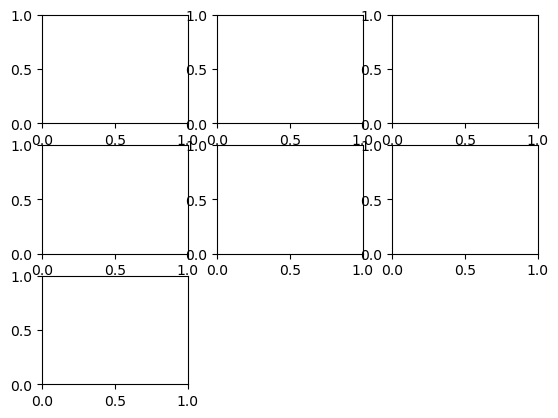

In [135]:
for i in range(1,8):
    plt.subplot(3,3,i)

<Axes: >

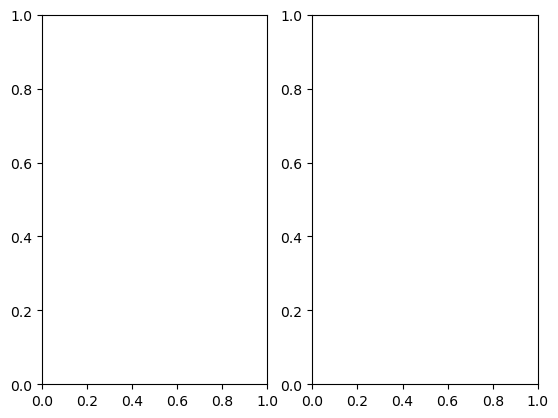

In [60]:
plt.subplot(1,2,1)
plt.subplot(1,2,2)

<Axes: >

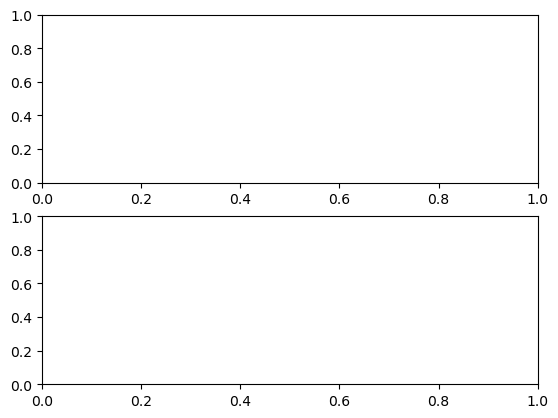

In [136]:
plt.subplot(2,1,1)
plt.subplot(2,1,2)

In [66]:
# Read the data again take two columns 
# 1) Continent 2) Case Status
# Draw the seaborn individually

In [137]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**Task-1**

<Axes: xlabel='case_status', ylabel='count'>

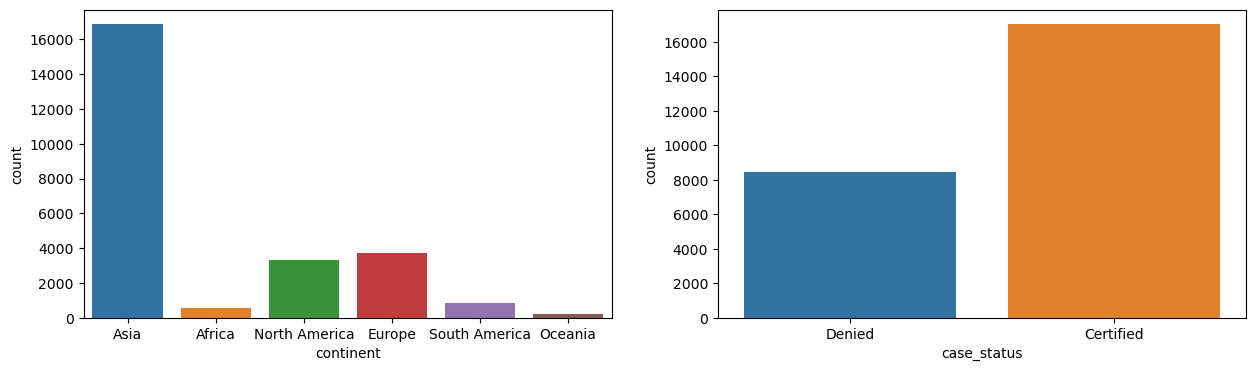

In [138]:
plt.figure(figsize=(15,4))
############################
plt.subplot(1,2,1)
sns.countplot(x = 'continent',data = visa_df)
############################
plt.subplot(1,2,2)
sns.countplot(x = 'case_status',data = visa_df)

<Axes: xlabel='case_status', ylabel='count'>

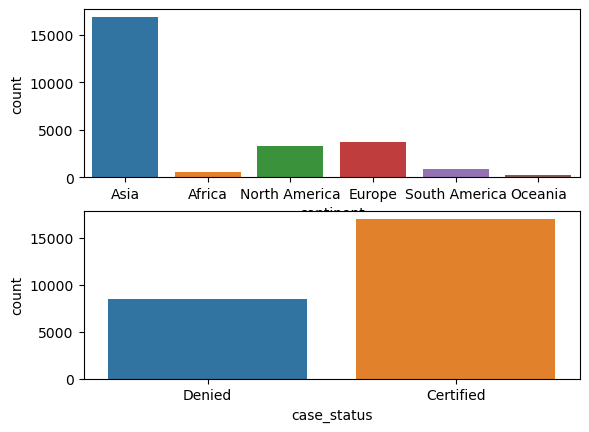

In [139]:
plt.subplot(2,1,1)
sns.countplot(x = 'continent',data = visa_df)
plt.subplot(2,1,2)
sns.countplot(x = 'case_status',data = visa_df)

**Task-2**

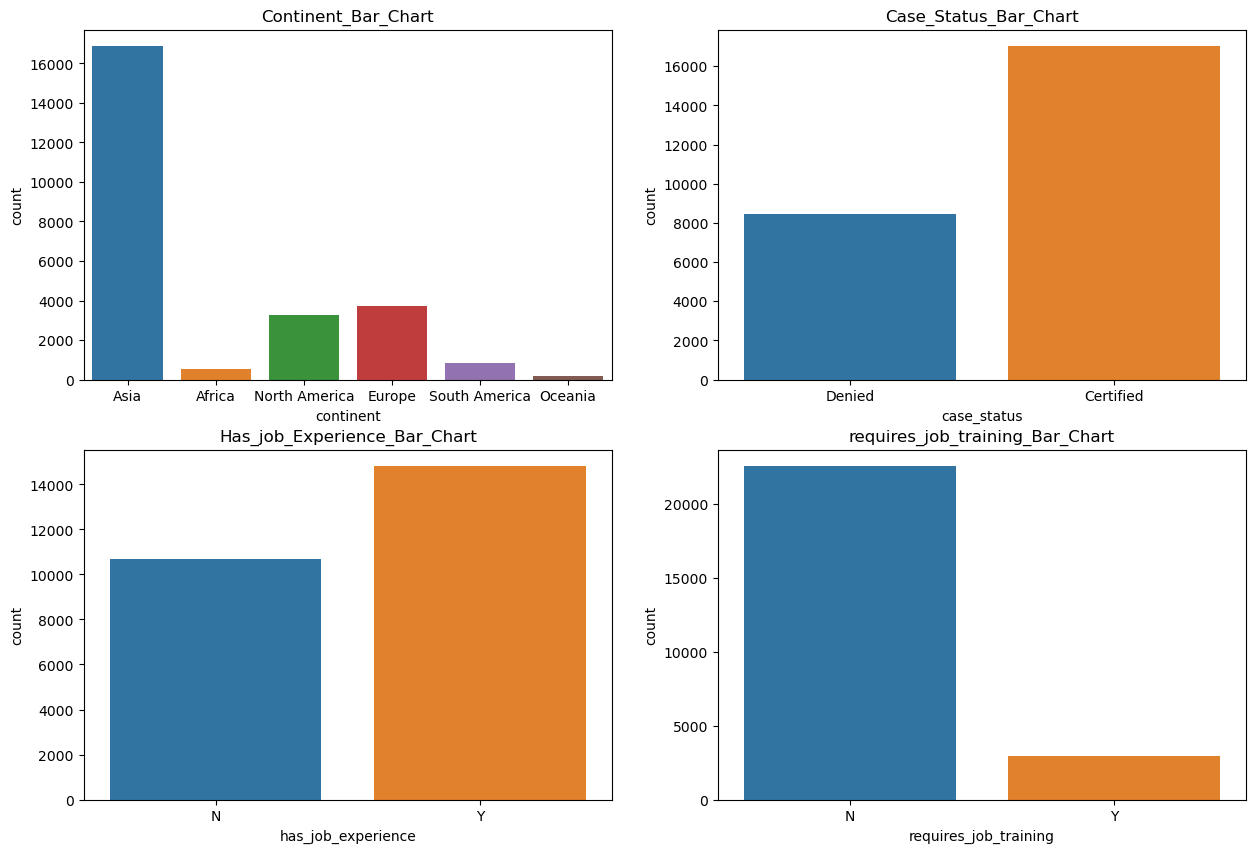

In [140]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x = 'continent',data = visa_df)
plt.title("Continent_Bar_Chart")

plt.subplot(2,2,2)
sns.countplot(x = 'case_status',data = visa_df)
plt.title("Case_Status_Bar_Chart")

plt.subplot(2,2,3)
sns.countplot(x = 'has_job_experience',data = visa_df)
plt.title("Has_job_Experience_Bar_Chart")

plt.subplot(2,2,4)
sns.countplot(x = 'requires_job_training',data = visa_df)
plt.title("requires_job_training_Bar_Chart")

plt.show()

**Task-3**

- Take cat columns, slice [1:]

- For loop should iterate

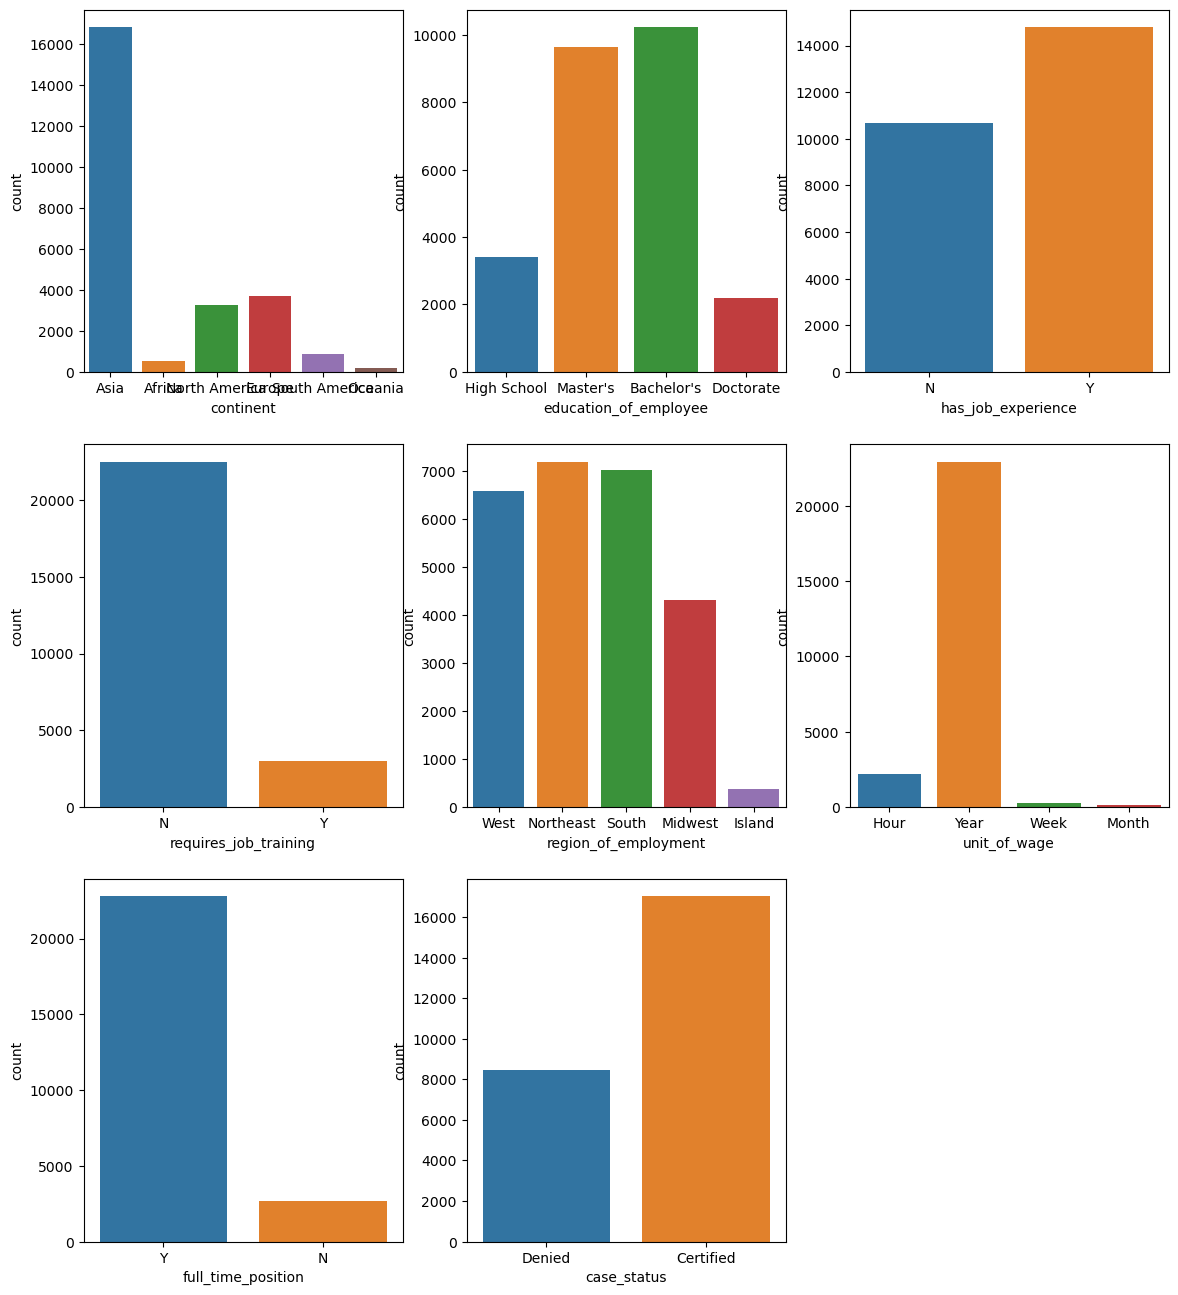

In [141]:
cols = cat_column[1:]
plt.figure(figsize= (14,16))
#
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
   
    sns.countplot(x = cols[i], data = visa_df)
    

In [95]:
pip install pdf2docx

     ---------------------------------------- 0.0/88.4 kB ? eta -:--:--
     ------------------ --------------------- 41.0/88.4 kB ? eta -:--:--
     ---------------------------------------- 88.4/88.4 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/132.0 kB ? eta -:--:--
   ---------------------------------------- 132.0/132.0 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.4/38.8 MB 13.4 MB/s eta 0:00:03
    --------------------------------------- 0.9/38.8 MB 11.4 MB/s eta 0:00:04
   - -------------------------------------- 1.3/38.8 MB 10.4 MB/s eta 0:00:04
   - -------------------------------------- 1.6/38.8 MB 9.5 MB/s eta 0:00:04
   -- ------------------------------------- 2.0/38.8 MB 8.9 MB/s eta 0:00:05
   -- ------------------------------------- 2.3/38.8 MB 8.8 MB/s

In [100]:
from pdf2docx import Converter

def convert_pdf_to_word(pdf_file, docx_file):
    # Create a Converter object
    cv = Converter(pdf_file)
    
    # Convert PDF to Word
    cv.convert(docx_file)
    
    # Close the converter
    cv.close()

# Example usage
pdf_file = r"C:\Users\madhu\OneDrive\Documents\Naresh IT\EDA\CV_Madhur_Gokhale (2).pdf"
docx_file = 'output.docx'
convert_pdf_to_word(pdf_file, docx_file)


[INFO] Start to convert C:\Users\madhu\OneDrive\Documents\Naresh IT\EDA\CV_Madhur_Gokhale (2).pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[INFO] [3/4] Parsing pages...
[INFO] (1/1) Page 1
[INFO] [4/4] Creating pages...
[INFO] (1/1) Page 1
[INFO] Terminated in 2.12s.


**Method-3**

In [142]:
# Whenever you open the file read the data and import the packages

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
visa_df = pd.read_csv(path)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [146]:
types = dict(visa_df.dtypes)
cat_column = [key for key,value in types.items()  if value == 'object']
num_column = [key for key,value in types.items()  if value != 'object']
cat_column

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [147]:
cdf = visa_df['continent'].value_counts()

keys = cdf.keys()
values = cdf.values
cols = ['Labels','Count']
df = pd.DataFrame(zip(keys,values),columns = cols)
df.to_csv('Continent.csv',index = False)
df

,Labels,Count
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


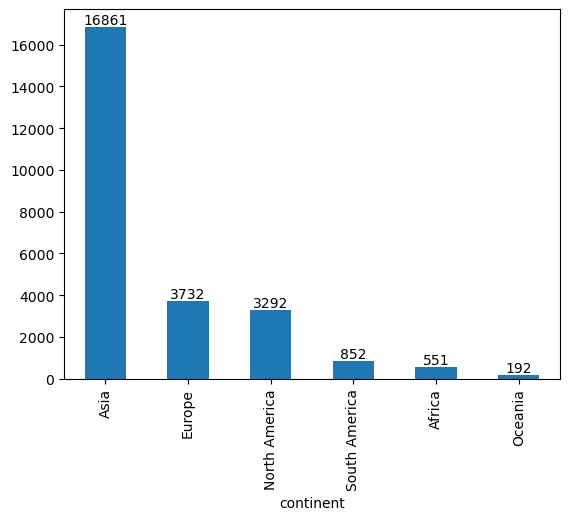

In [159]:
# Apply the value counts for categorical cloumns
# continent
# save that value counts in a variable
# new_variable = cdf.plot(kind = 'bar')
# new_variable.bar_label(new_variable.containers[0])
# plt.show()



ax = cdf.plot(kind = 'bar')
ax.bar_label(ax.containers[0])
plt.show()


In [ ]:
######################################################
import seaborn as sns
for i in cat_column[1:]:
    plt.figure(figsize = (8,4))
    order_continents = visa_df[i].value_counts().keys()
    sns.countplot(data = visa_df,
                 x = i,
                 order = order_continents )
    plt.title("Bar Chart")
    plt.savefig(f"{new_dir}\{i}_seaborn.jpg")
    plt.show()


#####################################################
import matplotlib.pyplot as plt
for i in dfs:
    df = pd.read_csv(i)
    plt.bar('Labels', 
            'Count',
            data = df)
    
    plt.title("Bar Chart") 
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.savefig(f"{new_dir}\\{i}_matplotlib.jpg")
    plt.show() 

######################################################
ax = cdf.plot(kind = 'bar')
ax.bar_label(ax.containers[0])
plt.show()

**Pie Chart**

- Pie chart is a 360 degrees view 

- It is under matplotliob package

- It will take the keys and values

- That we will get from value counts

  

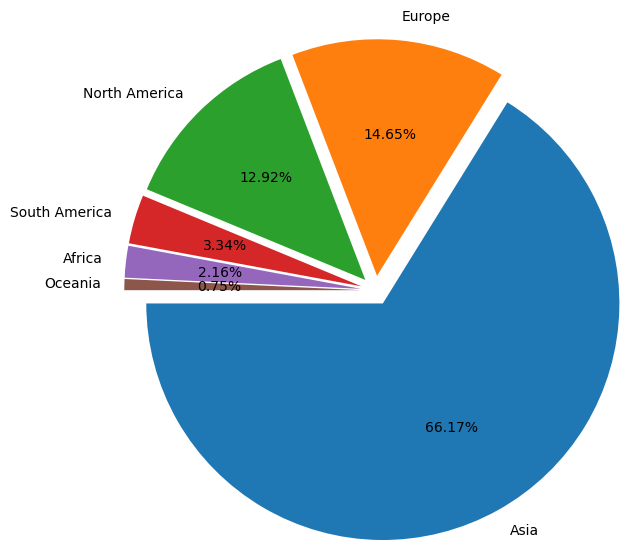

In [179]:
# Step-1: get keys seperately frm continent Value counts
# Step-2: get values from continent value counts
# Step-3: plt.pie verify the arguments
#         which arguments takes values and keys


cds = visa_df['continent'].value_counts()

keys = cds.keys()

values = cds.values

plt.pie(x = values,
        explode = [0.1,0.1,0.1,0.1,0.1,0.1],
        labels = keys,
        autopct = "%0.2f%%",
        radius = 1.6,
        startangle = 180)
plt.show()